In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("5.1-scalerdata.csv")

In [3]:
df.head()

,normal_feature,positive_skewed,with_outliers
0,52.483571,5.402733,30.039006
1,49.308678,2.511673,34.360602
2,53.238443,1.276804,29.206030
3,57.615149,4.119086,38.160507
4,48.829233,28.631211,31.877002


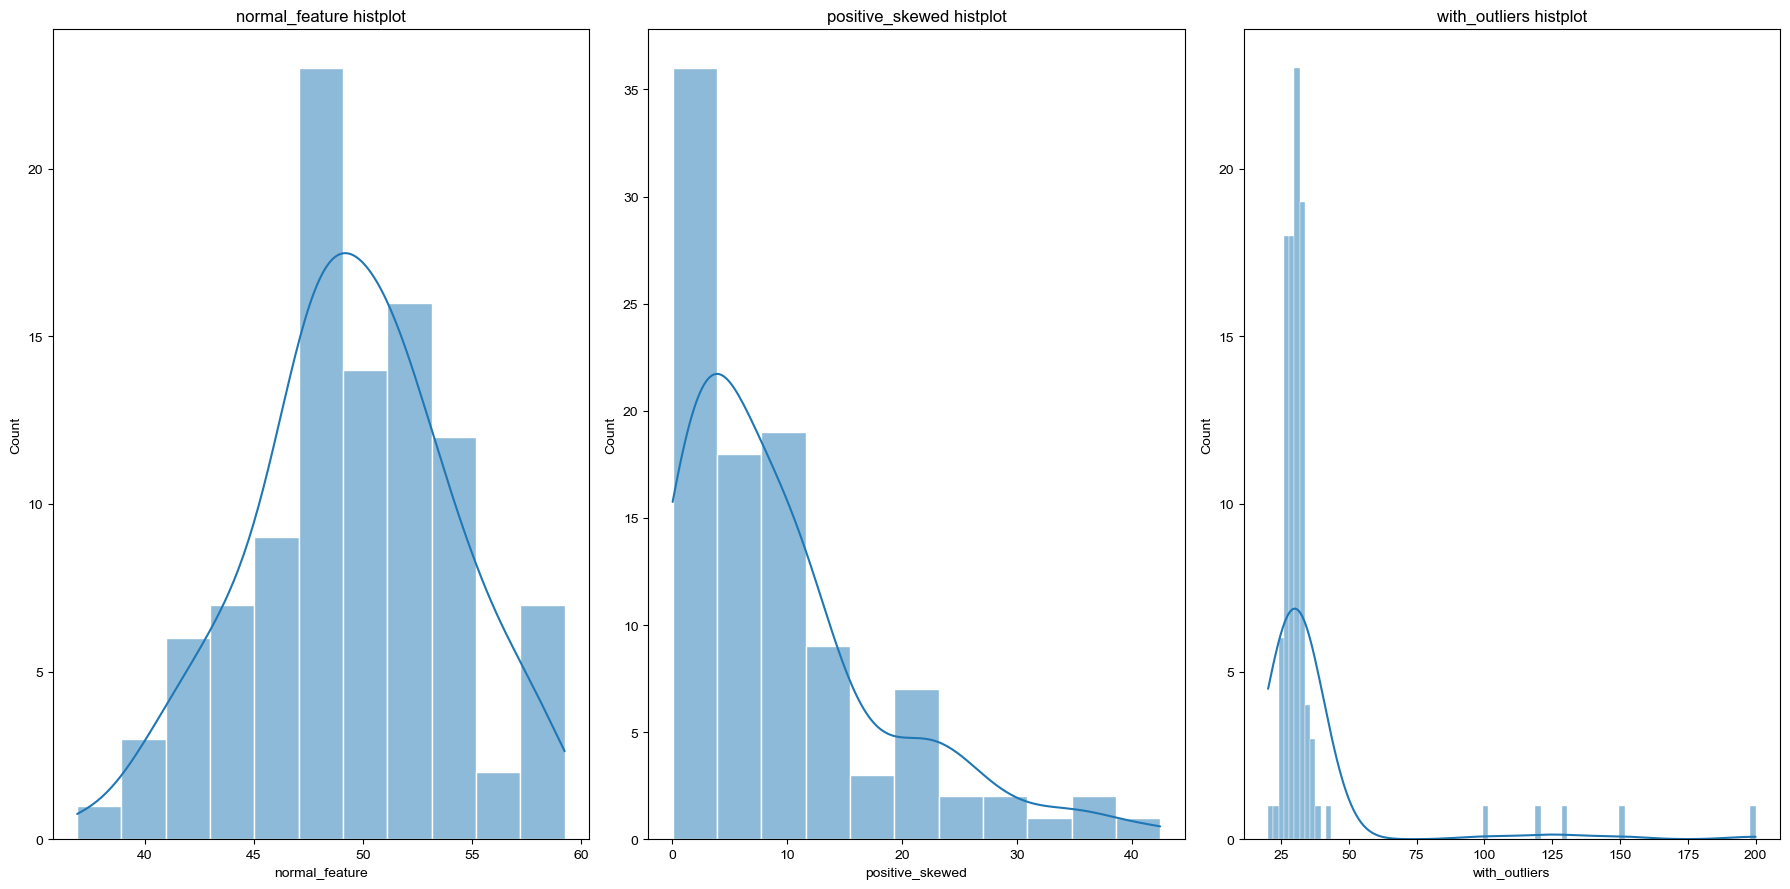

In [4]:
columns = df.columns
fig, ax = plt.subplots(1,3,figsize=(18,9))
ax = ax.flatten()
for i, col in enumerate(columns):
    sns.set_style("whitegrid")
    sns.histplot(
        x=col,
        data=df,
        ax=ax[i],
        kde=True
    )
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Count")
    ax[i].set_title(f"{col} histplot")

plt.tight_layout()
plt.show()

In [6]:
scalers = {
    "Standart Scaler": StandardScaler(),
    "MinMax Scaler": MinMaxScaler(),
    "Robust Sclaer": RobustScaler()
}

scaled_dfs = {}

for name, scaler in scalers.items():
    scaled_df = scaler.fit_transform(df)
    scaled_dfs[name] = pd.DataFrame(scaled_df, columns=df.columns)

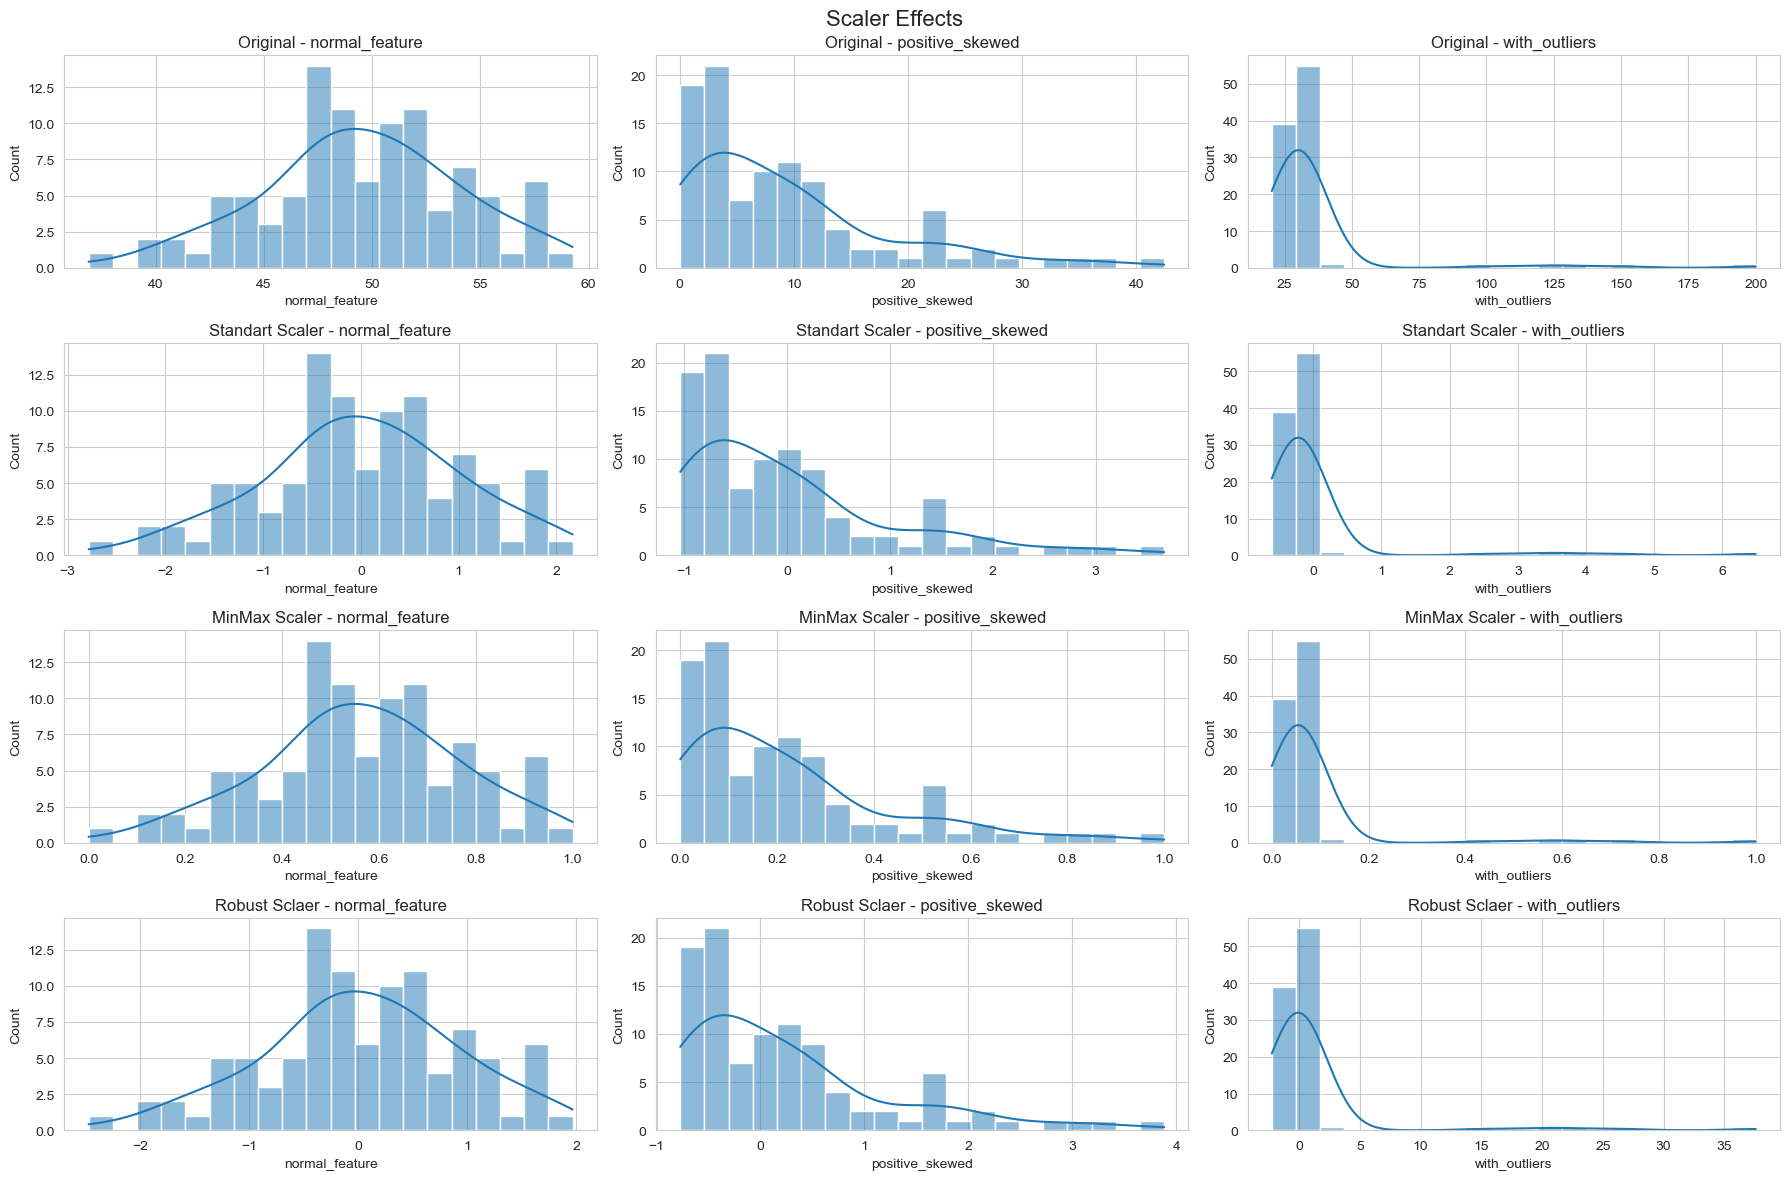

In [7]:
def plot_histograms(scaled_dfs, df_original):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
    fig.suptitle("Scaler Effects", fontsize=16)

    for i, col in enumerate(df_original.columns):
        sns.histplot(df_original[col], kde=True, ax=axes[0, i], bins=20)
        axes[0, i].set_title(f"Original - {col}")

    for row, (name, sdf) in enumerate(scaled_dfs.items(), start=1):
        for i, col in enumerate(sdf.columns):
            sns.histplot(sdf[col], kde=True, ax=axes[row, i], bins=20)
            axes[row, i].set_title(f"{name} - {col}")

    plt.tight_layout()
    plt.show()

plot_histograms(scaled_dfs, df)